# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [7]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')

### Step 4. See the first 10 entries

In [8]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Text(0.5, 1.0, 'Top 5 Ordered Chipotle Items')

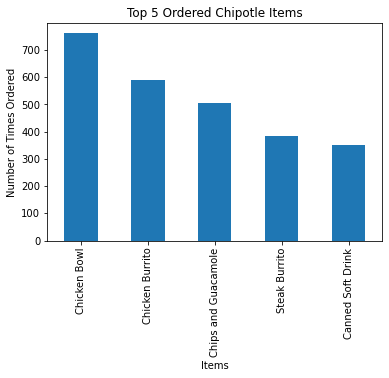

In [70]:

#First, sum the items based on the item name
a = chipo.groupby('item_name').sum()
#Next, sort the values of the new variable by quantity. By having ascending = False, the order will be descending
#and the top 5 values will be our top 5 ordered items
b = a.sort_values(by = 'quantity', ascending = False)
#Slice the first 5 items and just the quantity
c = b.iloc[:5,1]
#plot
c.plot(kind = "bar")
#Clean up plot (axis, units, title, etc.)
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Top 5 Ordered Chipotle Items')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0.5, 1.0, 'The number of items ordered per order price')

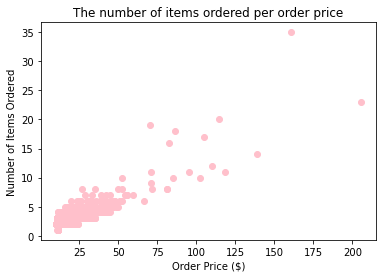

In [40]:
#chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]
a = chipo.groupby('order_id').sum()
a
plt.plot(a.item_price,a.quantity,'o',c = 'pink')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.title('The number of items ordered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

Pearsons correlation: 0.264


Text(0, 0.5, 'Number of Items Ordered')

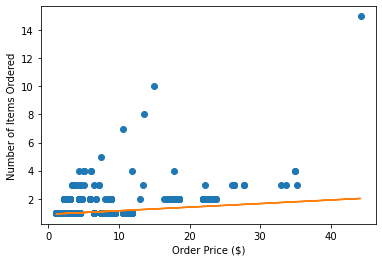

In [90]:
# Do higher priced items sell less than lower priced items?
#The low slope (0.03) and low Pearson correlation (0.26) indicates that there is little to no relationship between
#order price and the number of items ordered. Therefore, according to this dataset, there is no strong reason to 
#keep prices low.

plt.plot(chipo.item_price,chipo.quantity,'o')
x,y = chipo.item_price,chipo.quantity
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
